<a href="https://colab.research.google.com/github/Md-Atif-Khan/NLP-Project-/blob/main/NLP(Project-Round%20-1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

In [ ]:
!pip install PyPDF2

In [ ]:
from nltk.probability import FreqDist, ConditionalFreqDist
import PyPDF2
import nltk
import numpy as np
import pandas as pd
import re
import random
from nltk import FreqDist
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.corpus import brown
nltk.download('averaged_perceptron_tagger')
nltk.download('brown')
from nltk.util import bigrams
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
# pdf_path = '/content/gullivers-travels-1-12.pdf'
org_pdf_path = '/content/gullivers-travels.pdf'
def extract_text_from_pdf(pdf_path):
    text = ""
    with open(pdf_path, 'rb') as pdf_file:
        pdf_reader = PyPDF2.PdfReader(pdf_file)
        for page in range(len(pdf_reader.pages)):
            text += pdf_reader.pages[page].extract_text()
    return text


In [7]:
pdf_text = extract_text_from_pdf(org_pdf_path)

In [8]:
# print(pdf_text[0:20000])

# **Text Processing and Frequency Distribution**

In [9]:
copy_pdf_text = pdf_text

In [10]:
cnt = pdf_text.count(" Free eBooks at Planet eBook")
cnt

191

In [11]:
copy_pdf_text = re.sub(r" Free eBooks at Planet eBook", "", copy_pdf_text)
copy_pdf_text = re.sub(r'[^\x00-\x7F]+', '', copy_pdf_text)
copy_pdf_text = re.sub(r'Gullivers Travels (\d*)?([^0-9\x00-\x7F])?', '', copy_pdf_text)
copy_pdf_text = re.sub(r'\.com\s*', '', copy_pdf_text)
copy_pdf_text = re.sub(r'RICHARD SYMPSON.', '', copy_pdf_text)
copy_pdf_text = re.sub(r'Chapter [IVXLCDM]+', '', copy_pdf_text)

In [12]:
# print(pdf_text[0: 2000])
# print(copy_pdf_text[0: 10000])

In [13]:
lines_to_remove = 6
lines = copy_pdf_text.split('\n')
lines = lines[lines_to_remove:]
copy_pdf_text = '\n'.join(lines)

In [14]:
copy_pdf_text = re.sub(r'(?<!-)\n', '', copy_pdf_text)
copy_pdf_text = re.sub(r'-', '', copy_pdf_text)
copy_pdf_text = re.sub(r'\n', ' ', copy_pdf_text)
copy_pdf_text = re.sub(r'\.(?=\w)', '. ', copy_pdf_text)
# copy_pdf_text = re.sub(r'([!-/:-@[-`{-~])((?=\w)|(?<=\w))|((?<=\w))([!-/:-@[-`{-~])', r'\1 \2', copy_pdf_text)
copy_pdf_text = re.sub(r'^\((.)|(.)\)$', r'( \1\2 )', copy_pdf_text)

In [15]:
print(copy_pdf_text)

As given in the original edition. The author of these Travels, Mr. Lemuel Gulliver, is my an  cient and intimate friend; there is likewise some relation between us on the mothers side. About three years ago, Mr. Gulliver growing weary of the concourse of curious people coming to him at his house in Redriff, made a small pur  chase of land, with a convenient house, near Newark, in Nottinghamshire, his native country; where he now lives retired, yet in good esteem among his neighbours. Although Mr. Gulliver was born in Nottinghamshire, where his father dwelt, yet I have heard him say his family came from Oxfordshire; to confirm which, I have observed in the churchyard at Banbury in that county, several tombs and monuments of the Gullivers. Before he quitted Redriff, he left the custody of the fol  lowing papers in my hands, with the liberty to dispose of them as I should think fit. I have carefully perused them three times. The style is very plain and simple; and the only fault I find is

In [16]:
tokens = word_tokenize(copy_pdf_text)
# tokens1 = [word for word in tokens if word.isalpha()] #use this tokens1 if you need to eliminate alphanumeric character also
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
filtered_text = ' '.join(filtered_tokens)

In [17]:
print(tokens)

['As', 'given', 'in', 'the', 'original', 'edition', '.', 'The', 'author', 'of', 'these', 'Travels', ',', 'Mr.', 'Lemuel', 'Gulliver', ',', 'is', 'my', 'an', 'cient', 'and', 'intimate', 'friend', ';', 'there', 'is', 'likewise', 'some', 'relation', 'between', 'us', 'on', 'the', 'mothers', 'side', '.', 'About', 'three', 'years', 'ago', ',', 'Mr.', 'Gulliver', 'growing', 'weary', 'of', 'the', 'concourse', 'of', 'curious', 'people', 'coming', 'to', 'him', 'at', 'his', 'house', 'in', 'Redriff', ',', 'made', 'a', 'small', 'pur', 'chase', 'of', 'land', ',', 'with', 'a', 'convenient', 'house', ',', 'near', 'Newark', ',', 'in', 'Nottinghamshire', ',', 'his', 'native', 'country', ';', 'where', 'he', 'now', 'lives', 'retired', ',', 'yet', 'in', 'good', 'esteem', 'among', 'his', 'neighbours', '.', 'Although', 'Mr.', 'Gulliver', 'was', 'born', 'in', 'Nottinghamshire', ',', 'where', 'his', 'father', 'dwelt', ',', 'yet', 'I', 'have', 'heard', 'him', 'say', 'his', 'family', 'came', 'from', 'Oxfordshire

In [18]:
len(set(filtered_tokens))
len(filtered_tokens)

64415

In [19]:
fdist = FreqDist(filtered_tokens)
df1 = pd.DataFrame(fdist.items(), columns=['Token', 'Frequency']).sort_values(by='Frequency', ascending=False)
df1 = df1.reset_index(drop = True)

In [20]:
df1.head(10)

,Token,Frequency
0,",",9920
1,.,2679
2,;,1551
3,could,391
4,upon,374
5,would,370
6,:,317
7,great,289
8,one,259
9,two,250


In [21]:
df1.drop(index=df1.index[:3], inplace = True)

In [22]:
(df1['Frequency'] == 1).sum()

4717

In [23]:
# freq_matrix = [[fdist.freq(token) for token in fdist.keys()]]
# freq_matrix

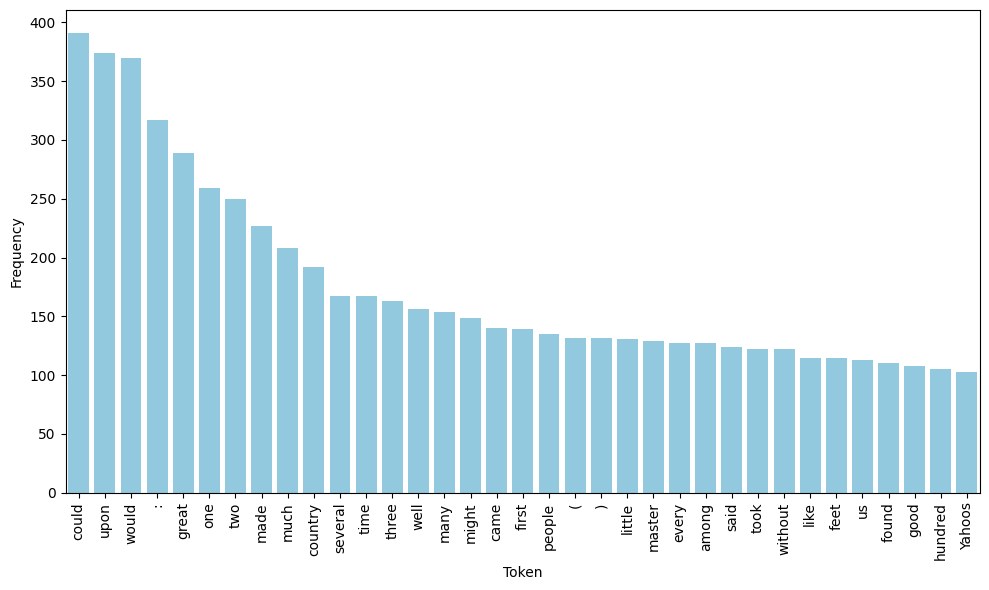

In [24]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df1.head(35), x='Token', y='Frequency', color='skyblue')
plt.xticks(rotation=90)
plt.tight_layout()


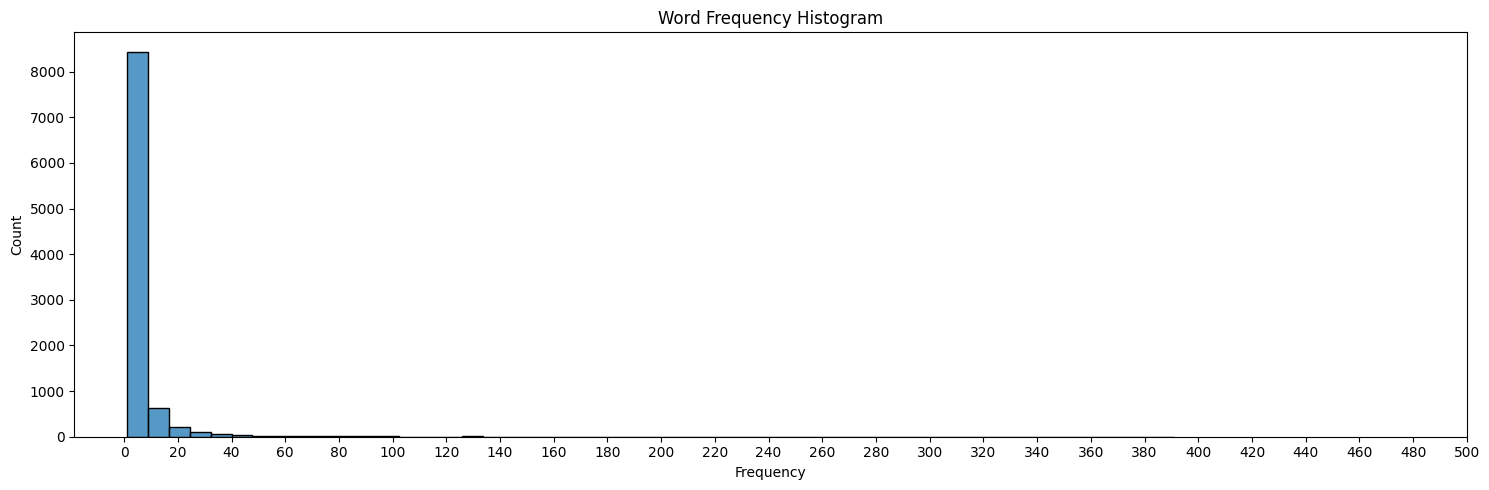

In [25]:
plt.figure(figsize=(15, 5))
sns.histplot(data=df1, x='Frequency', bins=50, kde=False)
plt.xticks(list(range(0, 501, 20)))
plt.xlabel('Frequency')
plt.ylabel('Count')
plt.title('Word Frequency Histogram')
plt.tight_layout()

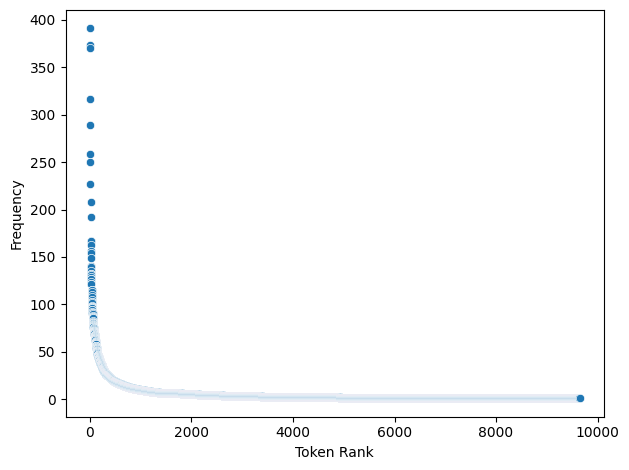

In [26]:
sns.scatterplot(data=df1, x=df1.index, y='Frequency')
plt.xlabel('Token Rank')
plt.ylabel('Frequency')
plt.tight_layout()

(-0.5, 999.5, 499.5, -0.5)

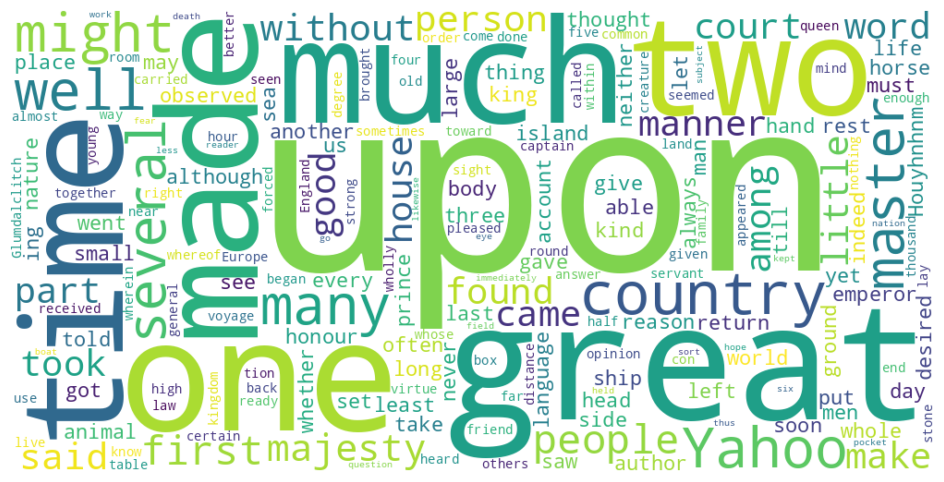

In [27]:
wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(filtered_text)
plt.figure(figsize=(15, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

# **POS TAGGING**

In [ ]:
categories = brown.categories()
combined_corpus = nltk.corpus.PlaintextCorpusReader('', [f'{cat}/*.txt' for cat in categories])
results = nltk.pos_tag(tokens)
tag_distribution1 = FreqDist(tag for tag1, tag in results)
df2 = pd.DataFrame(tag_distribution1.items(), columns=['PoS Tag', 'Frequency'])

In [50]:
df2.head(10)

,PoS Tag,Frequency
4,NN,15919
0,IN,15063
2,DT,11218
7,",",9920
14,PRP,7850
3,JJ,7280
20,VBD,6344
15,NNS,6015
13,RB,5136
10,CC,5018


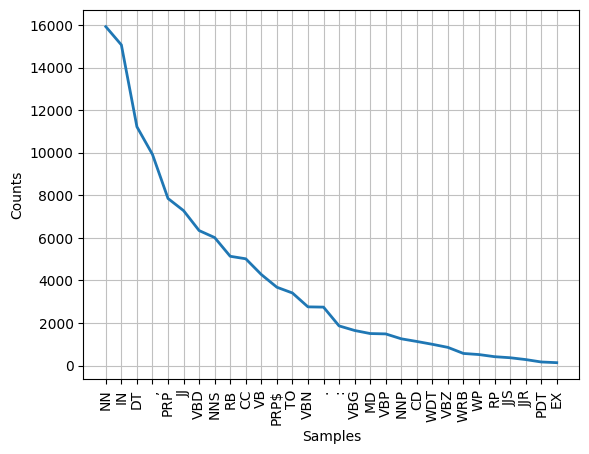

<Figure size 640x480 with 0 Axes>

In [49]:
tag_distribution1.plot(30, cumulative=False)
plt.xlabel("PoS Tags")
plt.ylabel("Frequency")
plt.title("PoS Tag Distribution (Brown Corpus)")
plt.clf()

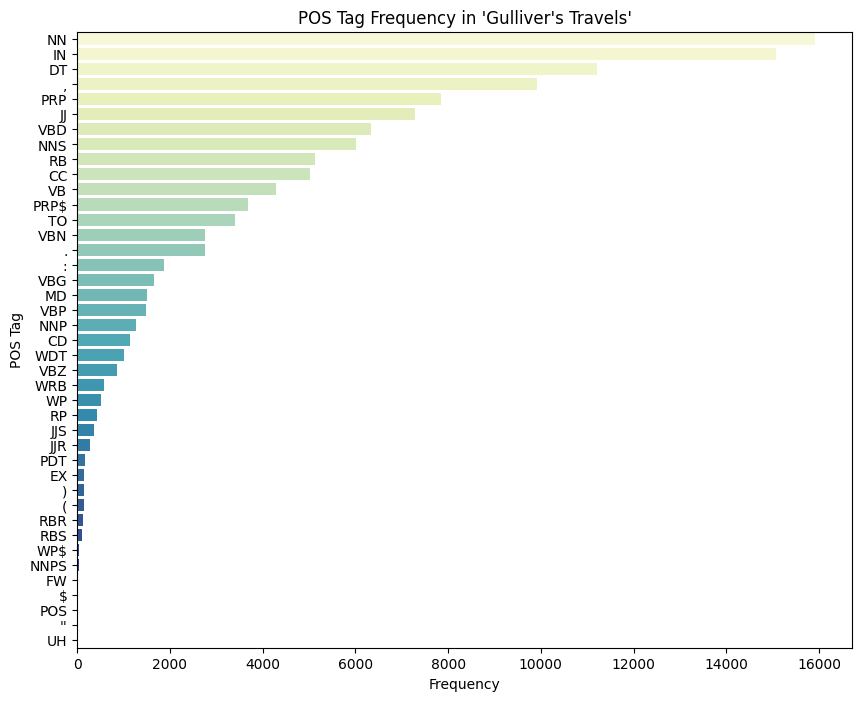

In [47]:
df2 = df2.sort_values(by="Frequency", ascending=False)
plt.figure(figsize=(10, 8))
sns.barplot(x="Frequency", y="PoS Tag", data=df2, palette="YlGnBu")
plt.xlabel("Frequency")
plt.ylabel("POS Tag")
plt.title("POS Tag Frequency in 'Gulliver's Travels'")

# **Bigrams**

In [37]:
sample_text = pdf_text

In [38]:
chapter_pattern = r"Chapter [IVXLCDM]+"
chapters = re.split(chapter_pattern, pdf_text)

In [39]:
#Getting the largest chapters of all the chapters present in the novel
largest_chapter = ""
largest_chapter_length = 0

for chapter in chapters:
    chapter_length = len(chapter)
    if chapter_length > largest_chapter_length:
        largest_chapter = chapter
        largest_chapter_length = chapter_length


In [40]:
# Tokenize the text into words
sample_tokens = nltk.word_tokenize(largest_chapter)

In [41]:
# Calculate bigrams in the sample text
sample_bigrams = list(bigrams(sample_tokens))

# Count the occurrences of each bigram
bigram_counts = Counter(sample_bigrams)

# Count the occurrences of each unigram
unigram_counts = Counter(sample_tokens)

# Calculate the probability of each bigram
bigram_probabilities = {bigram: bigram_counts[bigram] / unigram_counts[bigram[0]] for bigram in bigram_counts}

df = pd.DataFrame(bigram_probabilities.items(), columns=['Bigram', 'Probability'])
df

,Bigram,Probability
0,"(A, great)",0.500000
1,"(great, storm)",0.125000
2,"(storm, described)",0.200000
3,"(described, ;)",1.000000
4,"(;, the)",0.080000
...,...,...
4122,"(without, justice)",0.333333
4123,"(justice, ,)",0.500000
4124,"(,, accused.11)",0.002198
4125,"(accused.11, Free)",1.000000


In [42]:
chapters.remove(largest_chapter)
selected_chapter = random.choice(chapters)

# **Shanon Game**

In [43]:
def fill_in_blanks(chapter_tokens, blank_positions, bigram_probabilities):
    filled_text = list(chapter_tokens)  # Create a copy of the chapter tokens
    for position in blank_positions:
        if position < 1 or position >= len(chapter_tokens):
            continue  # Skip positions at the beginning or end of the chapter
        # Get the previous word
        previous_word = chapter_tokens[position - 1]
        # Find possible next words based on bi-gram probabilities
        possible_next_words = [word for word in bigram_probabilities if word[0] == previous_word]
        if possible_next_words:
            # Select the next word with the highest probability
            next_word = max(possible_next_words, key=lambda word: bigram_probabilities[word])
            filled_text[position] = next_word[1]  # Use the second word in the bi-gram as the replacement
    return filled_text

In [44]:
# Sample text (chapter you want to play the Shannon game with)
chapter_text = selected_chapter
# Tokenize the chapter text (assuming it's already tokenized)
chapter_tokens = nltk.word_tokenize(chapter_text)
# chapter_tokens = [word for word in chapter_tokens if word.isalpha()]

# Blank positions in the chapter text (assuming they are pre-defined)
blank_positions = [5, 8, 12, 15]  # Replace with the actual positions of blanks


# Replace the tokens at blank positions with '***'
for position in blank_positions:
    if position >= 0 and position < len(chapter_tokens):
        chapter_tokens[position] = '***'

copy_chapter_tokens = " ".join(chapter_tokens)
print(copy_chapter_tokens)

# Use the fill_in_blanks function to fill in the blank positions in the chapter
filled_text = fill_in_blanks(chapter_tokens, blank_positions, bigram_probabilities)

# Display the filled-in text
final_predicted_text = " ".join(filled_text)

A description of the farmer *** s daughter *** The author carried *** a market-town *** and then to the metropolis . The particulars of his journey . My mistress had a daughter of nine years old , a child of towardly parts for her age , very dexterous at her needle , and skilful in dressing her baby . Her mother and she contrived to fit up the baby ’ s cradle for me against night : the cradle was put into a small drawer of a cabinet , and the drawer placed upon a hanging shelf for fear of the rats . This was my bed all the time I staid with those people , though made more convenient by degrees , as I began to learn their language and make my wants known . This young girl was so handy , that after I had once or twice pulled off my clothes before her , she was able to dress and undress me , though I never gave her that trouble when she would let me do either myself . She made me seven shirts , and some other linen , of as fine cloth as could be got , which indeed was coarser than sackclo

In [45]:
print(final_predicted_text)

A description of the farmer , s daughter *** The author carried to a market-town *** and then to the metropolis . The particulars of his journey . My mistress had a daughter of nine years old , a child of towardly parts for her age , very dexterous at her needle , and skilful in dressing her baby . Her mother and she contrived to fit up the baby ’ s cradle for me against night : the cradle was put into a small drawer of a cabinet , and the drawer placed upon a hanging shelf for fear of the rats . This was my bed all the time I staid with those people , though made more convenient by degrees , as I began to learn their language and make my wants known . This young girl was so handy , that after I had once or twice pulled off my clothes before her , she was able to dress and undress me , though I never gave her that trouble when she would let me do either myself . She made me seven shirts , and some other linen , of as fine cloth as could be got , which indeed was coarser than sackcloth 

In [46]:
# Sample text (original chapter you want to compare with)
original_chapter_text = selected_chapter
# Tokenize the original chapter text (assuming it's already tokenized)
original_tokens = nltk.word_tokenize(selected_chapter)

# Calculate the accuracy of the filled text
def calculate_accuracy(original_tokens, filled_text, blank_positions):
    if len(original_tokens) != len(filled_text):
        raise ValueError("Original and filled token lists must have the same length.")

    correct_predictions = 0
    total_predictions = 0

    for position in blank_positions:
        if position < 0 or position >= len(original_tokens):
            continue  # Skip positions outside the valid token range

        original_word = original_tokens[position]
        filled_word = filled_text[position]

        total_predictions += 1
        if original_word == filled_word:
            correct_predictions += 1

    accuracy = (correct_predictions / total_predictions) * 100
    return accuracy

# Calculate accuracy
accuracy = calculate_accuracy(original_tokens, filled_text, blank_positions)

# Display the accuracy
print(f"Accuracy: {accuracy:.2f}%")


Accuracy: 25.00%
